In [1]:
import pandas as pd
data_url = "http://www-stat.wharton.upenn.edu/~waterman/DataSets/uva.txt"
df = pd.read_table(data_url)
df[:5]

,who,Newbie,Age,Gender,Household Income,Sexual Preference,Country,Education Attainment,Major Occupation,Marital Status,Years on Internet
0,id74364,0,54.0,Male,$50-74,Gay male,Ontario,Some College,Computer,Other,4-6 yr
1,id84505,0,39.0,Female,Over $100,Heterosexual,Sweden,Professional,Other,Other,1-3 yr
2,id84509,1,49.0,Female,$40-49,Heterosexual,Washington,Some College,Management,Other,Under 6 mo
3,id87028,1,22.0,Female,$40-49,Heterosexual,Florida,Some College,Computer,Married,6-12 mo
4,id76087,0,20.0,Male,$30-39,Bisexual,New Jersey,Some College,Education,Single,1-3 yr


In [2]:
df.pop('who')           # pop("칼러명") 칼럼 자체를 없애는
df.pop('Country')
df.pop('Years on Internet')

df.dtypes

Newbie                    int64
Age                     float64
Gender                   object
Household Income         object
Sexual Preference        object
Education Attainment     object
Major Occupation         object
Marital Status           object
dtype: object

In [4]:
category_cols = ["Gender", "Household Income", "Sexual Preference", "Education Attainment", "Major Occupation", "Marital Status"]
for col in category_cols:
  df[col] = df[col].astype('category')

df.dtypes

Newbie                     int64
Age                      float64
Gender                  category
Household Income        category
Sexual Preference       category
Education Attainment    category
Major Occupation        category
Marital Status          category
dtype: object

In [5]:
df_onehot = pd.get_dummies(df)
df_onehot.shape

(19583, 38)

In [6]:
df_onehot.isnull().sum()

Newbie                                 0
Age                                  561
Gender_Female                          0
Gender_Male                            0
Household Income_$10-19                0
Household Income_$20-29                0
Household Income_$30-39                0
Household Income_$40-49                0
Household Income_$50-74                0
Household Income_$75-99                0
Household Income_Over $100             0
Household Income_Under $10             0
Sexual Preference_Bisexual             0
Sexual Preference_Gay male             0
Sexual Preference_Heterosexual         0
Sexual Preference_Lesbian              0
Sexual Preference_Transgender          0
Sexual Preference_na                   0
Education Attainment_College           0
Education Attainment_Doctoral          0
Education Attainment_Grammar           0
Education Attainment_High School       0
Education Attainment_Masters           0
Education Attainment_Other             0
Education Attain

In [8]:
df_onehot.loc[pd.isnull(df_onehot['Age']), "Age"] = df_onehot["Age"].mean()

In [15]:
x_data = df_onehot.iloc[:, 1:].values
y_data = df_onehot.iloc[:, 0].values.reshape(-1, 1)
y_data.shape, x_data.shape

((19583, 1), (19583, 37))

In [16]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_data = min_max_scaler.fit_transform(x_data)

In [17]:
from numpy.random.mtrand import random_integers
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.33, random_state = 42)

X_train.shape, X_test.shape

((13120, 37), (6463, 37))

In [18]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept = True)
logreg.fit(X_train, y_train.flatten())

LogisticRegression()

In [20]:
LogisticRegression(C = 1.0, class_weight = None, dual = False,
                   fit_intercept = True, intercept_scaling = 1, l1_ratio = None, penalty = 'l2',
                   random_state = None, solver = 'warn', tol = 0.0001, verbose = 0, warm_start = False)

LogisticRegression(solver='warn')

In [21]:
logreg.predict(X_test[:5])

array([0, 0, 0, 0, 0])

In [22]:
logreg.predict_proba(X_test[:5])

array([[0.56843257, 0.43156743],
       [0.91112573, 0.08887427],
       [0.79481084, 0.20518916],
       [0.85841562, 0.14158438],
       [0.62764603, 0.37235397]])

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_true = y_test.copy()
y_pred = logreg.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[4487,  275],
       [1350,  351]])

In [24]:
accuracy_score(y_true, y_pred)

0.7485687761101656

In [27]:
from sklearn.metrics import confusion_matrix

y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]
confusion_matrix(y_true, y_pred)

array([[2, 0],
       [1, 3]])

In [28]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
(tn, fp, fn, tp)

(2, 0, 1, 3)

In [29]:
# pos_label = 2 -> 2번에 대한 결과를 그려짐 (넣지않으면 에러)
# y = np.array([1, 1, 2, 2])
# [1,1] -> 1번 [2,2] -> 2번

import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)

In [37]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]

jin_lenght = [56, 47, 56, 46,49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

In [38]:
d_data = np.column_stack((dach_length, dach_height))
d_label = np.zeros(len(d_data))

In [39]:
j_data = np.column_stack((jin_lenght, jin_height))
j_label = np.ones(len(j_data))

In [40]:
newdata = [[59, 35]]

In [41]:
dogs = np.concatenate((d_data, j_data))
labels = np.concatenate((d_label, j_label))

In [42]:
dog_classes = { 0 : '닥스훈트', 1 : '진돗개'}
k = 3
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(dogs, labels)
y_pred = knn.predict(newdata)
print('데이터', newdata, '판정결과 : ', dog_classes[y_pred[0]])

데이터 [[59, 35]] 판정결과 :  닥스훈트


In [43]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.data[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [44]:
# .shape 행,열 추출

In [46]:
print(iris.data.shape)

(150, 4)


In [47]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [48]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [49]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['target'] = pd.Series(iris.target)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [50]:
iris_df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [51]:
iris_df.values

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [53]:
X = iris_df.iloc[:, :4]
y = iris_df.iloc[:, -1]

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

def iris_knn(X, y, k):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  return metrics.accuracy_score(y_test, y_pred)

k = 3
scores = iris_knn(X, y, k)
print("n_neighbors가 {0:d}일 때 정확도 : {1:.3f}".format(k, scores))

n_neighbors가 3일 때 정확도 : 0.978


In [57]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

k = 3
iris = load_iris()
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(iris.data, iris.target)

KNeighborsClassifier(n_neighbors=3)

(array([[50.,  0.,  0.],
        [ 0., 47.,  3.],
        [ 0.,  3., 47.]]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <matplotlib.collections.QuadMesh at 0x7f15b1e3dde0>)

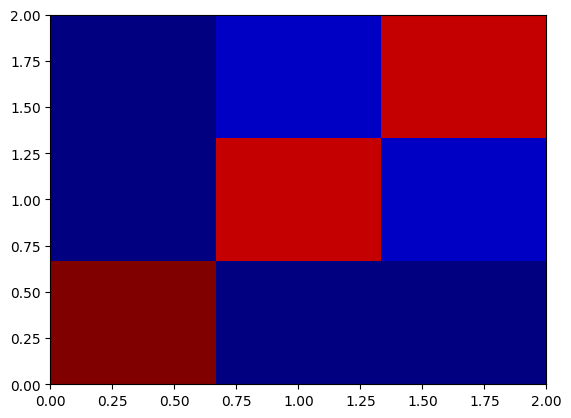

In [58]:
classes = {0:'setosa', 1:'versicolor', 2:'virginica'}

X = [[4, 2, 1.3, 0.4], [4, 3, 3.2, 2.2]]
y = knn.predict(X)

y_pred_all = knn.predict(iris.data)
scores = metrics.accuracy_score(iris.target, y_pred_all)

import matplotlib.pyplot as plt
plt.hist2d(iris.target, y_pred_all, bins=(3,3), cmap = plt.cm.jet)

(array([[50.,  0.,  0.],
        [ 0., 47.,  3.],
        [ 0.,  3., 47.]]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <matplotlib.collections.QuadMesh at 0x7f15b1e38460>)

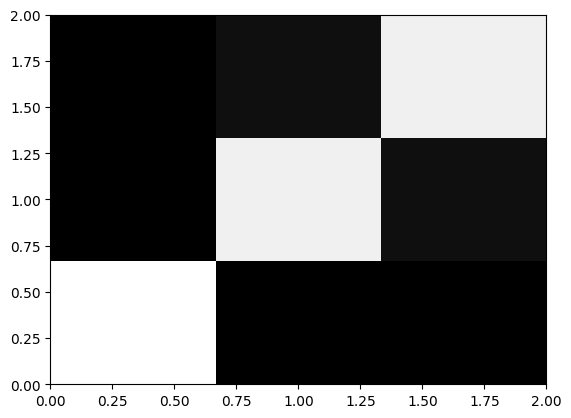

In [59]:
import matplotlib.pyplot as plt
plt.hist2d(iris.target, y_pred_all, bins=(3,3), cmap = plt.cm.gray)

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_loc = 'https://github.com/dongupak/DataML/raw/main/csv/'
game_usage = pd.read_csv(data_loc + 'game_usage.csv')
game_usage.head(3)

,time spent,game level
0,39,944
1,55,705
2,29,757


In [63]:
X = game_usage['time spent']
y = game_usage['game level']

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


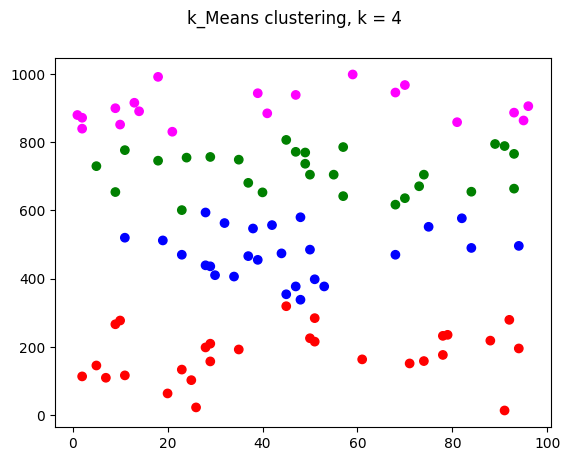

In [64]:
from sklearn import cluster

def kmeans_predict_plot(data, k):
  model = cluster.KMeans(n_clusters = k)
  model.fit(data)
  labels = model.predict(data)
  colors = np.array(['red', 'green', 'blue', 'magenta'])
  plt.suptitle('k_Means clustering, k = {}'.format(k))
  plt.scatter(data[:, 0], data[:, 1], color = colors[labels])

gamer_data = np.column_stack((X, y))
kmeans_predict_plot(gamer_data, k=4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(0.0, 1000.0)

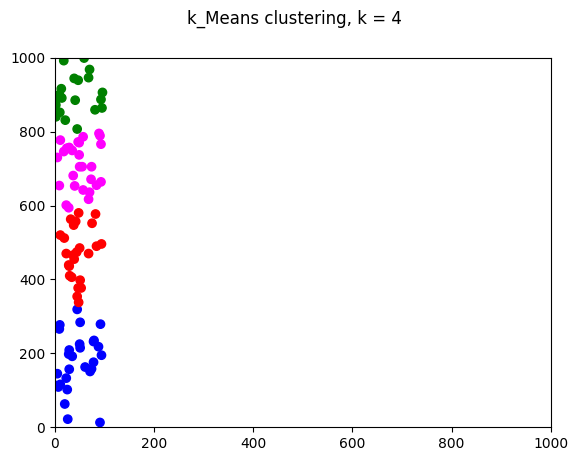

In [65]:
kmeans_predict_plot(gamer_data, k=4)
plt.xlim(0,1000); plt.ylim(0, 1000)

In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(gamer_data)
n_data = scaler.transform(gamer_data)
n_data[:, 0].mean(), n_data[:, 1].mean()

(0.4731578947368421, 0.5324949290060852)

In [67]:
n_data[:, 0].min(), n_data[:,0].max()

(0.0, 1.0)

In [69]:
n_data[:,1].min(), n_data[:, 1].max()

(0.0, 1.0)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


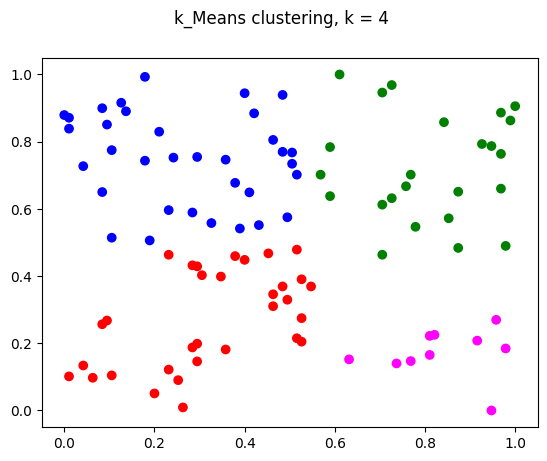

In [70]:
kmeans_predict_plot(n_data, k=4)

In [74]:
dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]

jin_lenght = [56, 47, 56, 46,49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

In [76]:
d = np.column_stack((dach_length, dach_height))
j = np.column_stack((jin_lenght, jin_height))
x = np.concatenate((d, j))
y = [0]*len(d) + [1]*len(j)
print('dogs : ', x)
print('labels : ', y)

dogs :  [[55 30]
 [57 31]
 [64 36]
 [63 30]
 [58 33]
 [49 25]
 [54 37]
 [61 34]
 [56 52]
 [47 52]
 [56 50]
 [46 53]
 [49 50]
 [53 53]
 [52 49]
 [48 54]]
labels :  [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]


In [88]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm = Pipeline([('scaler', StandardScaler()), ('linearSVC', LinearSVC(C=1, loss='hinge'))])
svm.fit(x, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linearSVC', LinearSVC(C=1, loss='hinge'))])

In [96]:
import pandas as pd
import numpy as np

In [102]:
data_loc = 'https://github.com/dongupak/DataML/raw/main/csv/'
df = pd.read_csv(data_loc + 'two_classes.csv')
df.tail(3)

,x1,x2,y
997,-4.634470,0.300158,0
998,1.426275,-2.765590,1
999,1.988053,1.466494,1


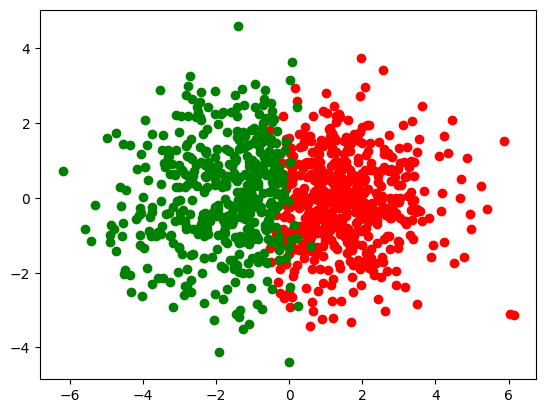

In [103]:
df_positive = df[df['y']==1]
df_negative = df[df['y']==0]

import matplotlib.pyplot as plt

plt.scatter(df_positive['x1'], df_positive['x2'], color='r')
plt.scatter(df_negative['x1'], df_negative['x2'], color='g')

In [105]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

In [106]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(max_depth=3)
dec_tree.fit(X,y)

DecisionTreeClassifier(max_depth=3)

In [108]:
from sklearn.tree import export_graphviz

export_graphviz(dec_tree, out_file=('./dec_tree_for_iris.dot'), feature_names=iris.feature_names)

!dir

dec_tree_for_iris.dot  sample_data


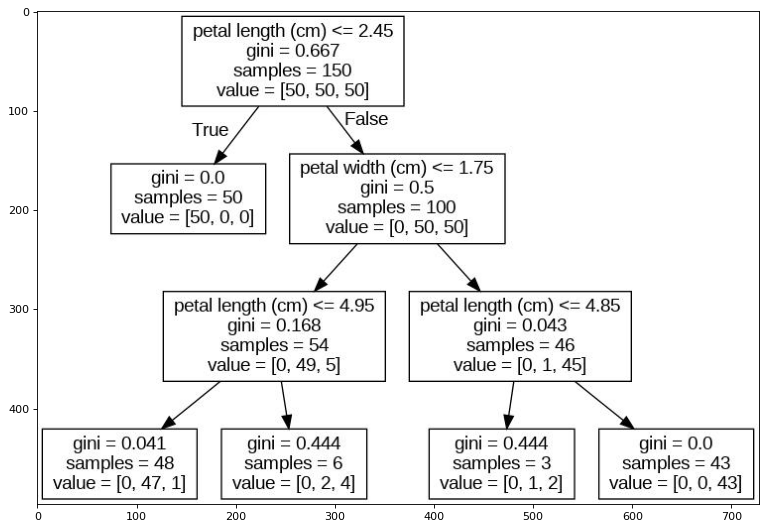

In [109]:
!dot -Tjpg dec_tree_for_iris.dot -o dec_tree_for_iris.jpg

import matplotlib.pyplot as plt

dec_tree_img = plt.imread('./dec_tree_for_iris.jpg')
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)